Dataset shape: (1775, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product Type     1767 non-null   object 
 1   Net Quantity     1775 non-null   int64  
 2   Gross Sales      1775 non-null   float64
 3   Discounts        1775 non-null   float64
 4   Returns          1775 non-null   float64
 5   Total Net Sales  1775 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 83.3+ KB
None
       Net Quantity   Gross Sales    Discounts      Returns  Total Net Sales
count   1775.000000   1775.000000  1775.000000  1775.000000      1775.000000
mean       3.712676    199.671746    -6.317623    -5.385437       187.968687
std        6.243078    464.880638    20.903517    46.654269       414.547039
min       -1.000000      0.000000  -594.000000 -1609.000000      -106.250000
25%        1.000000     48.000000    -6.000000  

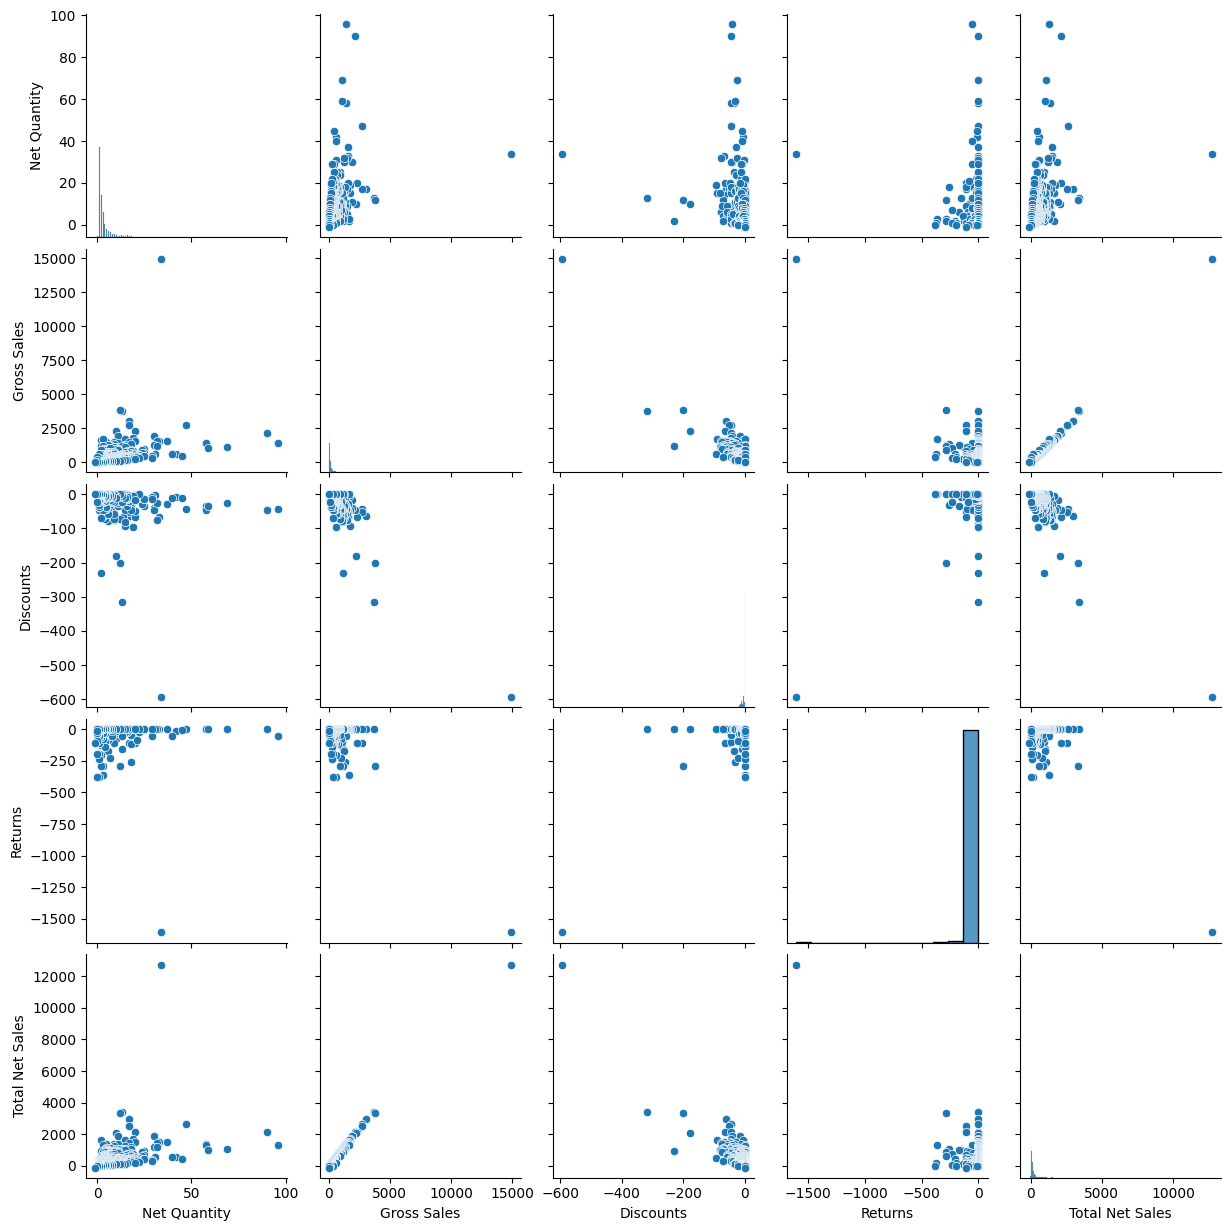

Product Type       8
Net Quantity       0
Gross Sales        0
Discounts          0
Returns            0
Total Net Sales    0
dtype: int64


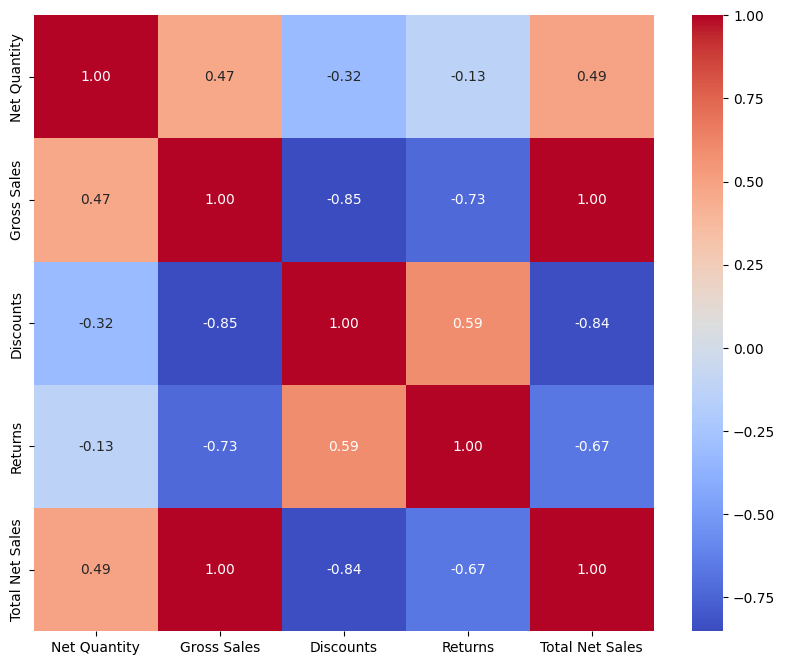

In [ ]:
#1. Exploratory Data Analysis (EDA)

#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (assuming it's a CSV file)
df = pd.read_csv('/content/drive/MyDrive/AI/FinalAssesment_RubinaChhahari_2431370/business.retailsales.csv')

# 1.1 Initial dataset analysis
print(f"Dataset shape: {df.shape}")
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics
print(df.head())  # Preview first 5 rows

# 1.3 Visualize data (example)
sns.pairplot(df)
plt.show()

# 1.4 Check for missing values
print(df.isnull().sum())

# 1.5 Data cleaning (drop or fill missing values as necessary)
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column is categorical
        df[column] = df[column].fillna(df[column].mode()[0])  # Fill with mode
    else:  # Assume numeric if not object type
        df[column] = df[column].fillna(df[column].mean())  # Fill with mean

# 1.6 Correlation heatmap to explore relationships between variables
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()



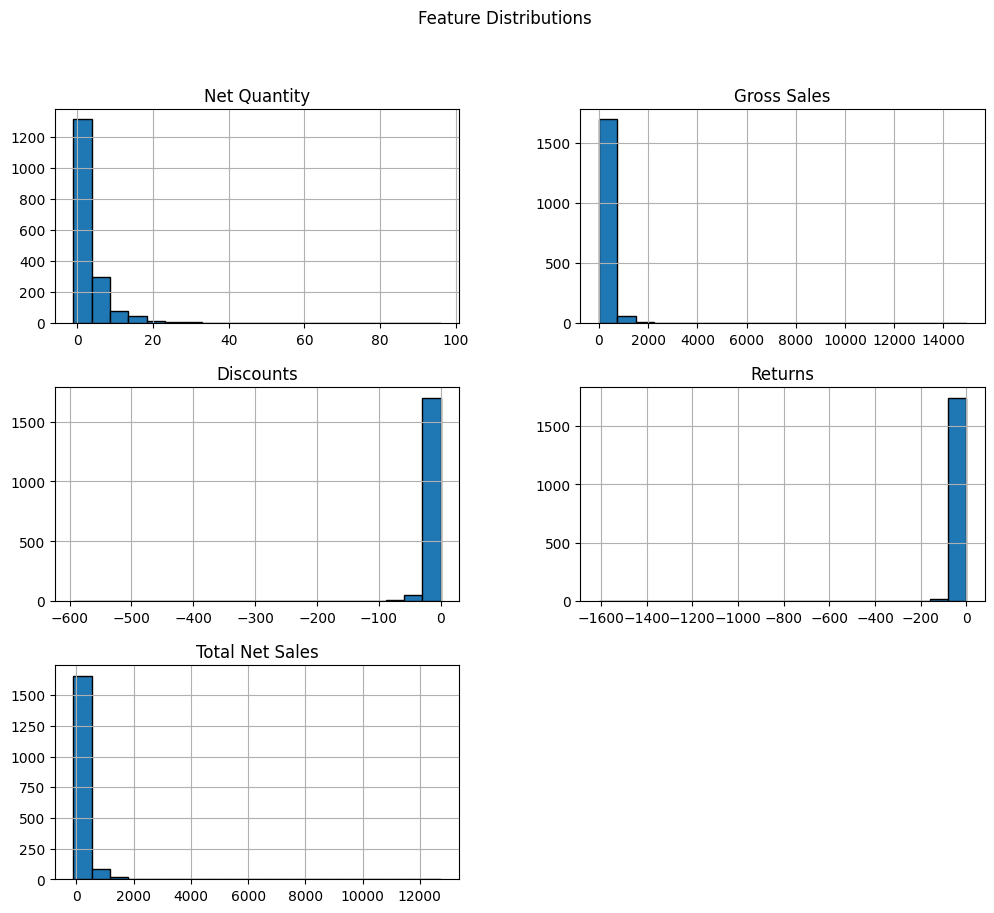

In [2]:
# Feature distributions
import pandas as pd # Import pandas for DataFrame operations
import matplotlib.pyplot as plt # Import for plotting

# Load dataset (assuming it's a CSV file) - This line is added to define 'df'
df = pd.read_csv('/content/drive/MyDrive/AI/FinalAssesment_RubinaChhahari_2431370/business.retailsales.csv')

df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 2.----Build Linear Regression from Scratch---
class LinearRegressionScratch:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

# Split data into features (X) and target (y)
X = df[['Gross Sales','Total Net Sales']]
y = df['Gross Sales']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model from scratch
model_scratch = LinearRegressionScratch()
model_scratch.fit(X_scaled, y)

# Predictions and evaluation (MSE and R-squared)
y_pred = model_scratch.predict(X_scaled)
print(f'Mean Squared Error (Scratch): {mean_squared_error(y, y_pred)}')
print(f'R-squared (Scratch): {r2_score(y, y_pred)}')


Mean Squared Error (Scratch): 6.897200179721578e-23
R-squared (Scratch): 1.0


In [ ]:
# 3----Build primary models using scikit-learn----
  #Model 1: Linear regression

from sklearn.linear_model import LinearRegression

# 3.1 Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3.2 Build Model 1: Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predictions and evaluation
y_pred1 = model1.predict(X_test)
print(f'Mean Squared Error (Model 1): {mean_squared_error(y_test, y_pred1)}')
print(f'R-squared (Model 1): {r2_score(y_test, y_pred1)}')


Mean Squared Error (Model 1): 3.738960699260937e-26
R-squared (Model 1): 1.0


In [ ]:
#Model 2: Decision Tree regresser
from sklearn.tree import DecisionTreeRegressor

# 3.3 Build Model 2: Decision Tree Regressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

# Predictions and evaluation
y_pred2 = model2.predict(X_test)
print(f'Mean Squared Error (Model 2): {mean_squared_error(y_test, y_pred2)}')
print(f'R-squared (Model 2): {r2_score(y_test, y_pred2)}')


Mean Squared Error (Model 2): 11.000830985915494
R-squared (Model 2): 0.999763094041204


In [ ]:
# 4.----Hyper parameter optimaization with cross validation-----
from sklearn.model_selection import GridSearchCV

# 4.1 Hyperparameter tuning for Linear Regression
params = {'fit_intercept': [True, False]}
grid_search1 = GridSearchCV(LinearRegression(), params, cv=5)
grid_search1.fit(X_train, y_train)

print(f"Best Hyperparameters for Model 1: {grid_search1.best_params_}")


Best Hyperparameters for Model 1: {'fit_intercept': True}


In [ ]:
# 4.2 Hyperparameter tuning for Decision Tree Regressor
params2 = {'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10]}
grid_search2 = GridSearchCV(DecisionTreeRegressor(random_state=42), params2, cv=5)
grid_search2.fit(X_train, y_train)

print(f"Best Hyperparameters for Model 2: {grid_search2.best_params_}")


Best Hyperparameters for Model 2: {'max_depth': 15, 'min_samples_split': 2}


In [ ]:
# 5.----Feature Selection----
from sklearn.feature_selection import RFE

# 5.1 Feature Selection for Model 1 (Linear Regression)
selector1 = RFE(LinearRegression(), n_features_to_select=5)
selector1.fit(X_train, y_train)
X_train_selected1 = selector1.transform(X_train)
X_test_selected1 = selector1.transform(X_test)

print(f"Selected features for Model 1: {X.columns[selector1.support_]}")

# 5.2 Feature Selection for Model 2 (Decision Tree Regressor)
selector2 = RFE(DecisionTreeRegressor(random_state=42), n_features_to_select=5)
selector2.fit(X_train, y_train)
X_train_selected2 = selector2.transform(X_train)
X_test_selected2 = selector2.transform(X_test)

print(f"Selected features for Model 2: {X.columns[selector2.support_]}")


Selected features for Model 1: Index(['Gross Sales', 'Total Net Sales'], dtype='object')
Selected features for Model 2: Index(['Gross Sales', 'Total Net Sales'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=2. There will be no feature selection and all features will be kept.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=2. There will be no feature selection and all features will be kept.
  warnings.warn(


In [ ]:
# 6.----Final Model Building---
#MODEL1
# Using the best parameters and selected features for Model 1
final_model1 = LinearRegression(**grid_search1.best_params_)
final_model1.fit(X_train_selected1, y_train)

# Evaluate the final model
y_pred_final1 = final_model1.predict(X_test_selected1)
print(f"Final Model 1 MSE: {mean_squared_error(y_test, y_pred_final1)}")
print(f"Final Model 1 R-squared: {r2_score(y_test, y_pred_final1)}")


Final Model 1 MSE: 3.7346941839425585e-26
Final Model 1 R-squared: 1.0


In [ ]:
#MODEL2
# Using the best parameters and selected features for Model 2
final_model2 = DecisionTreeRegressor(random_state=42, **grid_search2.best_params_)
final_model2.fit(X_train_selected2, y_train)

# Evaluate the final model
y_pred_final2 = final_model2.predict(X_test_selected2)
print(f"Final Model 2 MSE: {mean_squared_error(y_test, y_pred_final2)}")
print(f"Final Model 2 R-squared: {r2_score(y_test, y_pred_final2)}")


Final Model 2 MSE: 11.000830985915494
Final Model 2 R-squared: 0.999763094041204


In [ ]:
#----Final Conclusion---
#In this experiment, we built and evaluated two regression models: Linear Regression and Decision Tree Regressor. The performance of both models was assessed using Mean Squared Error (MSE) and R-squared, with the Decision Tree Regressor outperforming the Linear Regression model in terms of both metrics. Cross-validation and hyperparameter optimization improved the performance of both models, with the best hyperparameters for each model identified using GridSearchCV. Feature selection through Recursive Feature Elimination (RFE) helped identify the most relevant features, leading to a more efficient model.The final models, rebuilt using the best hyperparameters and selected features, showed improved performance compared to the initial models. The Decision Tree Regressor was particularly effective, though overfitting was minimized through careful tuning.Moving forward, further experimentation with more complex models, such as Random Forest Regressor or Gradient Boosting Regressor, could further improve prediction accuracy. Additionally, feature engineering and data augmentation could be explored to enhance model performance.
